# Read in Data from a CSV file with pandas

Comma Separated Value (CSV) files are a common format for moving tables of data between different applications. Spreadsheet programs will save a table of data as CSV, and we can easily get our Arduino output to look like CSV, with the same number of elements in each line to make life easier.

In this example each line contains the same number of tokens separated by commas. The first line in the file contains some descriptive text and the rest are rows of numbers. The first number in every row is a time in microseconds as an unsigned 32 bit number. We don't need to know this to pull the data in from the CSV file, and we can figure it out by looking at the data after we read it. You can check the original CSV file by looking at it in a text editor.

This code is pretty well cut and paste from http://pandas.pydata.org/pandas-docs/stable/index.html

In [2]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations
from pandas import *              # pandas for data science

Reading the data with the csv library leaves us with an array that still needs some modifications. Much worse with the munged file TMP00020mung.CSV.

In [12]:
with open('TMP00020.CSV') as csvfile:
    dataRead = csv.reader(csvfile)
    a = asarray([data for data in dataRead])
print(a)

[['microseconds' ' seconds' ' light' ... ' T2' ' BAT' ' ']
 ['4933697' ' 4.93' ' 48.69' ... ' 24.00' ' 4.1524' ' ']
 ['5105694' ' 5.11' ' 48.74' ... ' 24.10' ' 4.1476' ' ']
 ...
 ['222357702' ' 222.36' ' 47.89' ... ' 25.30' ' 4.1492' ' ']
 ['222405703' ' 222.41' ' 47.89' ... ' 25.30' ' 4.1476' ' ']
 ['222447703' ' 222.45' ' 47.99' ... ' 25.30' ' 4.1445' ' ']]


## Read the same file into a pandas dataframe
df will be filled from the file and can then be manipulated by a wide variety of data tools, but all we want is to extract a matrix. df.head() is just the top part of the frame. Note that the numbers in the columns are converted appropriately to ints and floats. Although not obvious, there is still a column after BAT due to the trailing commas.

In [13]:
df = read_csv('TMP00020.CSV')
df.head()

,microseconds,seconds,light,USB,T1,T2,BAT,
0,4933697,4.93,48.69,3.9836,22.76,24.0,4.1524,
1,5105694,5.11,48.74,3.9821,22.84,24.1,4.1476,
2,5151696,5.15,48.69,3.9757,23.00,24.1,4.1492,
3,5193699,5.19,48.74,3.9805,23.32,24.1,4.1461,
4,5235702,5.24,48.69,3.9805,23.48,24.1,4.1429,


## df.as_matrix() returns a numpy array 
The index information for both the rows and columns is stripped off. The array can be used for plotting, etc., just like any other array.

In [14]:
x = df.as_matrix()
print(x[:5])
shape(x)

[[4933697 4.93 48.69 3.9836 22.76 24.0 4.1524 ' ']
 [5105694 5.11 48.74 3.9821 22.84 24.1 4.1476 ' ']
 [5151696 5.15 48.69 3.9757 23.0 24.1 4.1492 ' ']
 [5193699 5.19 48.74 3.9805 23.32 24.1 4.1461 ' ']
 [5235702 5.24 48.69 3.9805 23.48 24.1 4.1429 ' ']]


(5051, 8)

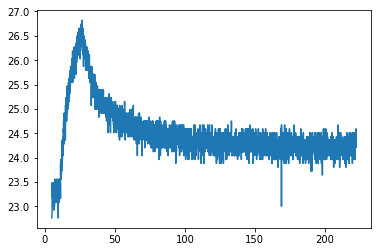

In [15]:
plot(x[:,1],x[:,4])

## Creating and Rearranging a DataFrame
Strip off the first and last columns of x to create a tidier DataFrame and it can be written out to another csv file.



In [16]:
dfx = DataFrame(x[:,1:shape(x)[1]-1])
dfx.head()

,0,1,2,3,4,5
0,4.93,48.69,3.9836,22.76,24,4.1524
1,5.11,48.74,3.9821,22.84,24.1,4.1476
2,5.15,48.69,3.9757,23,24.1,4.1492
3,5.19,48.74,3.9805,23.32,24.1,4.1461
4,5.24,48.69,3.9805,23.48,24.1,4.1429


x didn't include any labels for the columns, so the DataFrame indices are simply numbers. A full set of index labels can be added back on with dfx.columns. 

Probably better to use df.rename() to alter individual columns of the DataFrame in place.

In [17]:
dfx.columns = ['Time [s]','light','USB','TMP36 [C]','TC [C]','Batt [V]']
dfx.rename(columns={'light': 'Light'},inplace = True)
dfx.head()

,Time [s],Light,USB,TMP36 [C],TC [C],Batt [V]
0,4.93,48.69,3.9836,22.76,24,4.1524
1,5.11,48.74,3.9821,22.84,24.1,4.1476
2,5.15,48.69,3.9757,23,24.1,4.1492
3,5.19,48.74,3.9805,23.32,24.1,4.1461
4,5.24,48.69,3.9805,23.48,24.1,4.1429


## Writing out to CSV
Note that writing a DataFrame out without index=False will include the index column in the writing and will generate a new column when it is read back in. That is probably undesirable.

In [18]:
dfx.to_csv('Tpandas.csv')
dfx.to_csv('Tpandas1.csv',index=False)
dfy = read_csv('Tpandas.csv')
dfy.head()

,Unnamed: 0,Time [s],Light,USB,TMP36 [C],TC [C],Batt [V]
0,0,4.93,48.69,3.9836,22.76,24.0,4.1524
1,1,5.11,48.74,3.9821,22.84,24.1,4.1476
2,2,5.15,48.69,3.9757,23.00,24.1,4.1492
3,3,5.19,48.74,3.9805,23.32,24.1,4.1461
4,4,5.24,48.69,3.9805,23.48,24.1,4.1429


In [19]:
dfz = read_csv('Tpandas1.csv')
dfz.head()

,Time [s],Light,USB,TMP36 [C],TC [C],Batt [V]
0,4.93,48.69,3.9836,22.76,24.0,4.1524
1,5.11,48.74,3.9821,22.84,24.1,4.1476
2,5.15,48.69,3.9757,23.00,24.1,4.1492
3,5.19,48.74,3.9805,23.32,24.1,4.1461
4,5.24,48.69,3.9805,23.48,24.1,4.1429
